# 2 - Regression in Python

---

## A reminder of the key maths

### The data

We have gone out into the world and taken some measurements. These measurements form $(x, y)$ pairs. Last week we looked at an example where $x$ was the number of salespeople hired in a particular month and $y$ was the total number of cars sold in that same month. But these could of course represent any variables we like. 

$$
x\text{-data} = [x_1, x_2, x_3, ..., x_N] \\[0.4cm]
y\text{-data} = [y_1, y_2, y_3, ..., y_N]
$$

### The linear relationship

We decide that the $x$ and $y$ are likely to have some kind of linear relationship. We can describe this linear relationship by the eauation of a line. In general, we suggest that 

$$
y_i \approx mx_i + c
$$

where $y_i$ is the $i$th $y$-measurement and $x_i$  is the $i$th $x$-measurement. $m$ and $c$ are the gradient and intercept values. We want to find the values for $m$ and $c$ that best fit the data. 

### How good are our value of $m$ and $c$?

For a given value of $m$ and $c$ our 'prediction' for what $y_i$ should be is 

$$
mx_i + c
$$

however, the true measured value is $y_i$. The difference between our prediction and the real value is 

$$
\begin{align}
\text{error} &= \text{real value} \; - \text{prediction} \\
&= y_i - (mx_i+c) \\
&= y_i - mx_i - c
\end{align}
$$

This could be positive or negative, depending on whether the real value or our prediction is bigger. We therefore square this, because we really care about the size of this difference, not the sign. 

$$
(\text{real value} \; - \text{prediction})^2 = (y_i - mx_i - c)^2 
$$

We then look at this squared error for every data point we have collected and add it up

$$
\begin{align}
\text{total error} = (y_1 - mx_1 - c)^2  \, + \, (y_2 - mx_2 - c)^2 \, + \, ...  \\
\end{align}
$$

To keep things neat, mathematicians will often write this using summation notation

$$
\text{total error} = \sum_{i=1}^{N} (y_i - mx_i - c)^2 
$$

### Finding the best $m$ and $c$

For every value of $m$ and $c$ there is an associated error, which we can calculate using the equation above. We can find the best value of $m$ and $c$ by adjusting them and finding the values that minimise our total error. In practice, the way we do this is by finding the place where the derivitive of the error with respect to $m$ and $c$ is zero. 

## Exercise 1 

Play with the paramters $m$ and $c$ in the graph below to remind yourself of the role they play. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
np.set_printoptions(precision=3, linewidth=500, threshold=500, suppress=True)
%matplotlib notebook

In [4]:
%matplotlib notebook

In [6]:
from scripts.regression2 import *

<IPython.core.display.Javascript object>


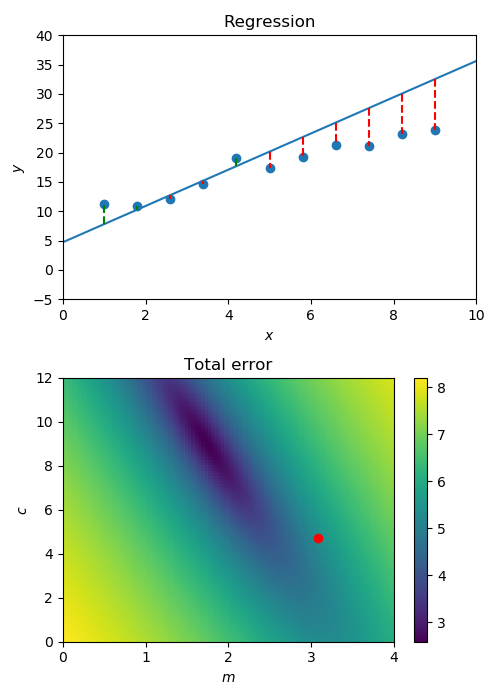

interactive(children=(FloatSlider(value=0.0, description='c', max=12.0, step=0.01), Output()), _dom_classes=('…

interactive(children=(FloatSlider(value=4.0, description='m', max=4.0, step=0.01), Output()), _dom_classes=('w…

In [7]:
make_graph_1()

## In this notebook we will learn how to use Python to find the best values for $m$ and $c$ without having to explicitly code any maths

---

## Let's create some toy data

For the purpose of this notebook we will create our own data with a 'known' true value for the gradient and intercept, which we will set. We will then try to recover those true values using regression.

The function `np.linspace(a, b, N)` creates a numpy array of `N` evenly spaced numbers between `a` and `b`. 

### Exercise 2

Play with different parameters for `a`, `b` and `N`. What do you notice?

In [ ]:
a = 0
b = 10
N = 11
np.linspace(a, b, N)

For our example we will use `a=0, b=10` and `N=11`

In [ ]:
a = 0                       # numbers will start from here
b = 10                      # numbers will end here
N = 11                      # we will create 11 data points
x = np.linspace(0, 10, N)   # create an array of 11 evenly spaced numbers between 0 and 10
x

Next we will set some 'true' values for the gradient and intercept

In [ ]:
# these will be the 'true' values of the gradient and intercept
c = 8   # the intercept
m = 2   # the grdaient

When we multiply a numpy array by a number we get a new array where each element is multiplied by that number. Similarly, when we add a constant to a numpy array every element gets that constant added to it. 

In [ ]:
# each value of y will be m times x plus c
y = m * x + c 

In [ ]:
print('x = ', x)
print('y = ', y)

In [ ]:
# let's plot this data to see what we've made so far
plt.figure()       # create a new figure
plt.scatter(x, y)  # scatter the data points x and y
plt.xlabel('x')    # add an x-label
plt.ylabel('y')    # add a y-label

## Adding noise

At this stage in the process we have a perfect straight line. In reality, we rarely measure two variables that have a perfect linear relationship. The world is messy, and we almost always have what's called 'noise' in our data. This could be from measurement error, or random fluctuation or both. 

In python we can simulate random noise by using the module `np.random`. This allows us to generate random numbers. Today we will focus on a particular type of random number - those coming from the *normal distribution*

### The normal distribution

The normal distribution is an example of a *probability distribution*. We use probability distributions to describe the likely values that a continuous random variable can take. 

An example of something that could be normally distributed is the height of people in a population. Some people will be very tall, some people will be very short, most people will be somewhere in the middle. 

The normal distribution is parametrised by two numbers: the distribution mean $\mu$ and the distribution width $\sigma$. Take a look at the graphs below. 


<IPython.core.display.Javascript object>


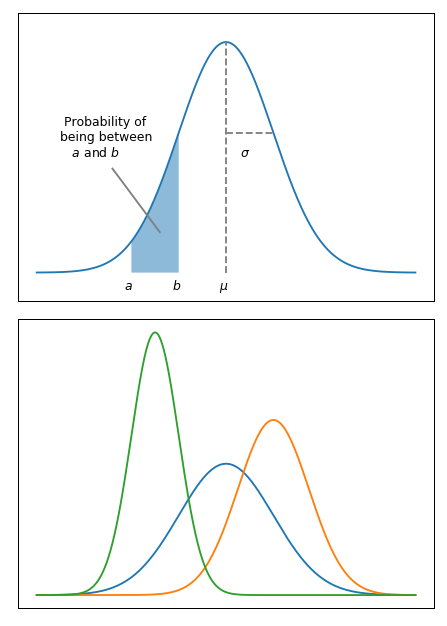

In [8]:
make_graph_2()

In Python we can create a random number drawn from a normal distribution by typing

In [ ]:
mu = 0              # set the distribution mean
sigma = 1           # set the distribution width
np.random.normal(mu, sigma)

We can also use this function to create an *array* of random numbers b. In this case, each number in the array will be drawn from the same distribution

In [ ]:
mu = 0              # set the distribution mean
sigma = 1           # set the distribution width
N = 11              # set how many random numbers to generate
np.random.normal(mu, sigma, N)

The way that we will add 'noise' to our observed data, `y`, is by adding a random array **of the same length**. 

In [ ]:
np.set_printoptions(floatmode='fixed')

In [ ]:
noise = np.random.normal(0, 2, 11)
y_obs = y + noise
print('y =         ', y)
print('noise =     ', noise)
print('y + noise = ', y_obs)

When we now plot `x` against `y` with the added noise, we get something that looks more like real data one might observe

In [ ]:
plt.figure()
plt.scatter(x, observation)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy observations')

### Exercise 3

Go back to the code above that produced the plot. Try adjusting the sigma parameter to make it larger or smaller. At what value do you think it becomes impossible to identify the linear trend?

---

## Solving the regression problem

We now have the data we need to solve the regression problem. 

$$
x\text{-data} = [x_1, x_2, x_3, ..., x_N] \\[0.4cm]
y\text{-data} = [y_1, y_2, y_3, ..., y_N]
$$

Recall that we preset the parameters as $m=2, c=8$. If our model is good, we should be able to recover those numbers. In order to do this, we are going to have to use some more numpy functions. 

### np.zeros

The numpy function `np.zeros` is used to create an 'empty' numpy array. It takes one parameter which can be either a number, or a pair of numbers. This specifies the length/shape of the array. First let's see what happens when we pass a single number. 

In [ ]:
np.set_printoptions(floatmode='unique')

In [ ]:
# this will create a 1D array of zeros, of length 10
np.zeros(10)

In [ ]:
# this will create a 1D array of zeros, of length 15
np.zeros(15)

In [ ]:
# CREATE AN ARRAY OF ZEROS OF LENGTH 20


We can also create 2D arrays. This is done by passing in a pair of numbers in brackets. NOTE this is not the same as passing in two numbers!!

```python
np.zeros(5, 3) # WRONG!
np.zeros((5, 3)) # RIGHT!
```

This will create *rectangle* of numbers (also known as a matrix!). The first numbers tells you the height, and the second number tells you the width

```python
height = 5
width = 3
np.zeros((height, width))
```

In [ ]:
np.zeros((5, 3))

In [ ]:
np.zeros((3, 5))

In [ ]:
# CREATE AN ARRAY OF ZEROS WITH A WIDTH OF 4 AND A HEIGHT OF 8!


### Exercise 4: Indexing a 2D array

We can index a 2D array in a similar way to a 1D array, with square brackets. Here, however, we need to provide two indices. Each individual element can be accessed like so

![](images/np-array.png)

In [ ]:
A = np.zeros((6, 4))
A

We can set values like so

In [ ]:
A[0, 0] = 1
A

Remember, the first number refers to the height dimension, and the second number refers to the width dimension. 

In [ ]:
A[2, 0] = 2
A

In [ ]:
A[2, 3] = 3
A

In [ ]:
# MAKE THE VALUE IN THE BOTTOM RIGHT OF THE 2D ARRAY 4


We can set a whole row equal to some number, or a whole column equal to some number

In [ ]:
B = np.zeros((5, 5))
B

In [ ]:
# set the 1th column equal to 1
B[:, 1] = 1
B

In [ ]:
# set the 1th row equal to 1
B[1, :] = 1
B

We can also set a row or column equal to some array, as long as the sizes match!

In [ ]:
b = np.array([1, 2, 3, 4, 5])
B[:, 3] = b
B

In [ ]:
# CREATE A NEW ARRAY OF SHAPE (8, 4) AND SET THE THIRD COLUMN EQUAL TO [8,7,6,5,4,3,2,1]


## Back to linear regression

In order to solve the linear regression problem, we need to create a matrix that has shape `(N, 2)` where `N` is the number of data points we have collected. Lets make that matrix now using `np.zeros`. (Remember, we started this notebook with N=11 data points). Ultimately we want a matrix that looks like this

$$
X =  \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

In [ ]:
# CREATE AN EMPTY MATRIX CALLED X THAT HAS A HEIGHT OF N=11 AND WIDTH 2
X = np.zeros((11, 2))

Next we are going to make every element in the first column of this matrix equal to 1

In [ ]:
# MAKE THE FIRST COLUMN ON X EQUAL TO 1. LOOK AT THE ABOVE EXAMPLES IF UNSURE
X[:, 0] = 1

Finally we are going to make the second column of X equal to our array of x observations. Check back up where we defined our x-observations. 

In [ ]:
# MAKE THE SECOND COLUMN OF X EQUAL TO OUR ARRAY OF X OBSERVATIONS
X[:, 1] = x

Finally, this matrix X can be used along with our observed y values to find the best values for the gradient and the intercept. The way we do that is via the function `np.linalg.lstsq`. 

In [ ]:
best_c, best_m = np.linalg.lstsq(X, y_obs)[0]
print('The best gradient value is ', best_m)
print('The best intercept value is ', best_c)

 ## Why does this work? What is lstsq doing?
 
 The function `np.linalg.lstsq` takes a data matrix X of shape `(N, 2)` and an observation vector y of length `N` and asks the following:

'For each of my N rows in the data matrix I'm going to multiply each number in that row by a constant, add them up, and compare that with the corresponding entry in the y vector. I'm going to find the square difference between these two for every row. What numbers should I multiply by to get the least square error in total?' 

This is why it's called `lstsq` - it's short for *least-square*. This also explains why we have to set the first column to 1. This column corresponds to our intercept. 

$$
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
\vdots & \vdots \\
1 & x_N \end{bmatrix} \times \begin{bmatrix} c \\ m \end{bmatrix} = \begin{bmatrix}
c + mx_1 \\
c + mx_2 \\
c + mx_3 \\
\vdots  \\
c + mx_N \end{bmatrix}
$$

## Exercise 5: Doing the whole process

Let's begin from the start and see if we can recover some new parameters. 

In [ ]:
# THE TRUE VALUES
m = 5
c = 10

# CREATE THE OBSERVED DATA ARRAYS
N = 101
x = np.linspace(-5, 5, N)
y = m * x + c + np.random.normal(0, 3, N)

# NOW, CREATE THE DATA MATRIX X
X = 


# NOW USE np.linalg.lstsq TO FIND THE OPTIMAL VALUES FOR m AND c



# FINALLY, SCATTER THE OBSERVED DATA AND PLOT YOUR BEST FIT
# REMEMBER TO USE plt.scatter AND plt.plot CORRECTLY
# REFER TO THE PLOTTING CODE ABOVE IF UNSURE

